In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
data = genfromtxt('ds1_train.csv', delimiter = ',')

In [3]:
X= data[:,[0,1]]
Y = data[:,[2]]

In [4]:
X = np.delete(X,0,0)
Y = np.delete(Y,0,0)

In [5]:
m,n = X.shape

In [6]:
phi = (Y==1).sum() / m

In [31]:
mu0 = X[Y[:,0]==0].sum(axis=0) / (Y==0).sum()
mu1 = X[Y[:,0]==1].sum(axis=0) / (Y==1).sum()

n_x = X[Y[:,0]==0] - mu0
p_x = X[Y[:,0]==1] - mu1

sigma = ((n_x.T).dot(n_x) + (p_x.T).dot(p_x)) / m

In [32]:
sigma

array([[9.53653342e-01, 5.87339678e+01],
       [5.87339678e+01, 1.15818332e+04]])

In [33]:
''''diff = X.copy()
diff[Y[:,0] == 0] -= mu0
diff[Y[:,0] == 1] -= mu1
sigma1 = (1 / m) * diff.T.dot(diff)''''

In [48]:
mu0 = mu0.reshape(-1,1)
mu1 = mu1.reshape(-1,1)
sigma_inv = np.linalg.inv(sigma)

In [51]:
theta = sigma_inv.dot(mu1 - mu0)

In [59]:
theta0 = 0.5 * (mu0.T.dot(sigma_inv).dot(mu0) - mu1.T.dot(sigma_inv).dot(mu1)) - np.log((1 - phi) / phi)

In [62]:
theta = np.vstack([theta0, theta])

In [63]:
theta

array([[-6.17158405],
       [ 2.22055506],
       [-0.01763375]])

In [81]:
def predict(x):
    g = lambda x : 1 / (1+np.exp(-x))
    preds = g(x*theta)
    return preds>0.7

In [72]:
val_data = genfromtxt('ds1_valid.csv', delimiter = ',')
X_val= val_data[:,[0,1]]
Y_val = val_data[:,[2]]
X_val = np.delete(X_val,0,0)
Y_val = np.delete(Y_val,0,0)
intercept_val = np.matrix(np.ones(len(X_val))).T
X_val = np.append(intercept_val,X_val,1)

In [82]:
y_preds = predict(X_val)

In [91]:

y_preds = y_preds*1


In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_val,y_preds)

0.89

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

datav = pd.read_csv('ds1_valid.csv')

X_vis = datav.iloc[:, :-1]
y_vis = datav.iloc[:, -1]

pos = datav.loc[y_vis==1]
neg = datav.loc[y_vis==0]


,x_1,x_2,y
50,4.878533,145.227867,1.0
51,2.635337,5.900009,1.0
52,4.449186,144.620260,1.0
53,3.558004,6.362452,1.0
54,3.587032,46.062342,1.0
55,4.923027,28.328045,1.0
56,3.161792,39.409271,1.0
57,3.019269,32.624745,1.0
58,3.640750,23.779436,1.0
59,4.162575,56.943440,1.0


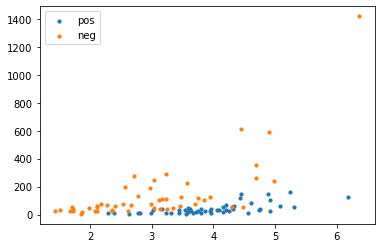

In [100]:
plt.scatter(pos.iloc[:, 0], pos.iloc[:, 1], s=10, label='pos')
plt.scatter(neg.iloc[:, 0], neg.iloc[:, 1], s=10, label='neg')
plt.legend()
plt.show()

In [122]:
parameters = theta.T.copy()
parameters = np.ravel(parameters)
parameters = list(parameters)
parameters


[-6.171584053680651, 2.2205550622761656, -0.017633752759284582]

In [105]:
X_vis.head()

,x_1,x_2
0,2.177396,78.630076
1,3.952131,123.541573
2,3.351176,47.752517
3,2.074934,26.997730
4,3.579775,226.703779


In [106]:
X_vis = np.c_[np.ones((X_vis.shape[0], 1)), X_vis]
y_vis = y_vis[:, np.newaxis]

In [138]:
x_values = [np.min(X_vis[:, 1] - 5), np.max(X_vis[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
x_values

[-3.5674841357112825, 1424.0491050837586]

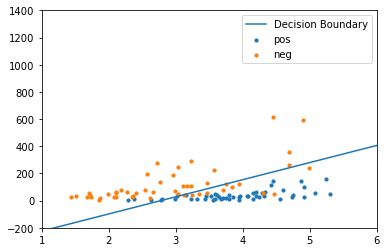

In [137]:
plt.scatter(pos.iloc[:, 0], pos.iloc[:, 1], s=10, label='pos')
plt.scatter(neg.iloc[:, 0], neg.iloc[:, 1], s=10, label='neg')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlim(1,6)
plt.ylim((-200,1400))

plt.legend()
plt.show()